<img src="https://media.giphy.com/media/Qx0zhgnni9e0g/giphy.gif" width=400>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=['label', 'text'])

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [12]:
for i in range(10):
    print(df.iloc[i, -1])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

# Data Cleaning

<img src="https://media.giphy.com/media/w8j2t9Rc28TSLavmt0/giphy.gif" width=400>

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [15]:
sn = SnowballStemmer("english")
stop = set(stopwords.words('english'))

In [35]:
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub("[^a-z0-9]", ' ', sms)
    sms = nltk.word_tokenize(sms)
    sms = [t for t in sms if len(t)>1]
    sms = [sn.stem(word) for word in sms if word not in stop]
    sms = ' '.join(sms)
    return sms

In [36]:
clean_text("Get is.. are.. playing they UNLIMITED <!!!>,,,??? Free data play  100GB... at Rs.0")

'get play unlimit free data play 100gb rs'

In [39]:
df['clean_text'] = df['text'].apply(clean_text)

In [40]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


# WordCloud

<img src="https://media.giphy.com/media/3o7WTFAHOpnxfCogGk/giphy.gif" width=300>

In [42]:
# pip install wordcloud

In [43]:
from wordcloud import WordCloud

In [51]:
hamdata = df[df['label'] =='ham']
hamdata = hamdata['clean_text']

In [57]:
def wordCloud(data):
    words = ' '.join(data)
    wc = WordCloud(background_color='white')
    wc = wc.generate(words)
    
    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

Ham Data words :


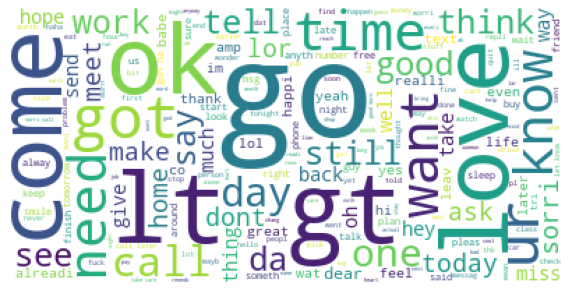

In [59]:
print("Ham Data words :")
wordCloud(hamdata)

In [61]:
spamdata = df[df['label'] =='spam']
spamdata = spamdata['clean_text']

Spam Data words :


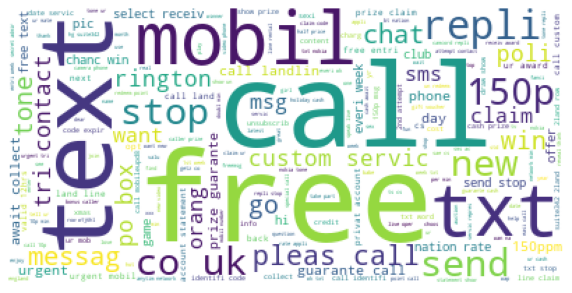

In [62]:
print("Spam Data words :")
wordCloud(spamdata)

# Featurization

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
cv = CountVectorizer(max_features=5000)

In [71]:
X = cv.fit_transform(df['clean_text']).toarray()

In [72]:
X.shape

(5572, 5000)

In [76]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Model Building
<img src="https://media.giphy.com/media/3rgXBAKopU55wtfp6g/giphy.gif" width=400>

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
model = MultinomialNB()

In [85]:
model.fit(X_train, y_train)

MultinomialNB()

In [87]:
y_pred = model.predict(X_test)

In [89]:
y_test, y_pred

(array([0, 1, 0, ..., 0, 1, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 1, 0], dtype=uint8))

In [93]:
pd.DataFrame({'Actual': y_test, 'Predicted':y_pred}).head(10)

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


# Evaluation

<img src="https://media.giphy.com/media/tf9jjMcO77YzV4YPwE/giphy.gif" width=200>

In [97]:
print("Accuracy on Training Data: ")
print( model.score(X_train, y_train) )

Accuracy on Training Data: 
0.9916984518734575


In [98]:
print("Accuracy on Test Data: ")
print( model.score(X_test, y_test) )

Accuracy on Test Data: 
0.9883408071748879


In [99]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [100]:
confusion_matrix(y_test, y_pred)

array([[949,   6],
       [  7, 153]])

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.96      0.96      0.96       160

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [103]:
f1_score(y_test, y_pred)

0.9592476489028213